In [1]:
# Imports, always include this at the beginning

# No science without NumPy
import numpy as np

# Matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib notebook

# for pretty printing the model
from IPython.display import display, Markdown

# Of course we want Glotaran
import glotaran as gta

In [2]:
# First we define our model specification. See the documentation for details how to do so.
model_spec = '''
type: kinetic

parameters:
    - kinetic: [101e-1, 202e-3,505e-4]
    - shapes:
      - 1:
        - ["amp", 3, false]
        - ["loc", 620, false]
        - ["width", 10, false]
      - 2:
        - ["amp", 10, false]
        - ["loc", 670, false]
        - ["width", 30, false]
      - 3:
        - ["amp", 5, false]
        - ["loc", 720, false]
        - ["width", 50, false]
    - irf:
      - ["center", 0.5]
      - ["width", 5]


compartments: [s1, s2, s3]

megacomplexes:
    - label: mc1
      k_matrices: [k1]

k_matrices:
  - label: "k1"
    matrix: {
      '("s1","s1")': kinetic.1,
      '("s2","s2")': kinetic.2,
      '("s3","s3")': kinetic.3,
}       

shapes: 
  - label: gauss1
    type: gaussian
    amplitude: shapes.1.amp
    location: shapes.1.loc
    width: shapes.1.width
  - label: gauss2
    type: gaussian
    amplitude: shapes.2.amp
    location: shapes.2.loc
    width: shapes.2.width 
  - label: gauss3
    type: gaussian
    amplitude: shapes.3.amp
    location: shapes.3.loc
    width: shapes.3.width

irf: 
  - label: irf1
    type: gaussian
    center: irf.center
    width: irf.width 
    
initial_concentrations: []

datasets: 
  - label: dataset1
    type: spectral
    megacomplexes: [mc1]
    irf: irf1
    shapes:
      - [s1, gauss1]
      - [s2, gauss2]
      - [s3, gauss3]
'''

# Then we can create our model
model = gta.parse(model_spec)
display(Markdown(str(model)))

# Model

_Type_: Kinetic

## Parameter
  * __kinetic__:
    * __1__: _Value_: 10.1, Min_: -inf, _Max_: inf, _Vary_: True, _Fit_: True
    * __2__: _Value_: 0.202, Min_: -inf, _Max_: inf, _Vary_: True, _Fit_: True
    * __3__: _Value_: 0.0505, Min_: -inf, _Max_: inf, _Vary_: True, _Fit_: True
  * __shapes__:
    * __1__:
      * __amp__: _Value_: 3.0, Min_: -inf, _Max_: inf, _Vary_: True, _Fit_: False
      * __loc__: _Value_: 620.0, Min_: -inf, _Max_: inf, _Vary_: True, _Fit_: False
      * __width__: _Value_: 10.0, Min_: -inf, _Max_: inf, _Vary_: True, _Fit_: False
    * __2__:
      * __amp__: _Value_: 10.0, Min_: -inf, _Max_: inf, _Vary_: True, _Fit_: False
      * __loc__: _Value_: 670.0, Min_: -inf, _Max_: inf, _Vary_: True, _Fit_: False
      * __width__: _Value_: 30.0, Min_: -inf, _Max_: inf, _Vary_: True, _Fit_: False
    * __3__:
      * __amp__: _Value_: 5.0, Min_: -inf, _Max_: inf, _Vary_: True, _Fit_: False
      * __loc__: _Value_: 720.0, Min_: -inf, _Max_: inf, _Vary_: True, _Fit_: False
      * __width__: _Value_: 50.0, Min_: -inf, _Max_: inf, _Vary_: True, _Fit_: False
  * __irf__:
    * __center__: _Value_: 0.5, Min_: -inf, _Max_: inf, _Vary_: True, _Fit_: True
    * __width__: _Value_: 5.0, Min_: -inf, _Max_: inf, _Vary_: True, _Fit_: True


## Compartments

* s1
* s2
* s3

## Megacomplexes

* __mc1__
: _K-Matrices_: ['k1']


## Datasets

### _dataset1_

* Dataset Scaling: None
* Initial Concentration: None
* Megacomplexes: ['mc1']
* Megacomplex Scalings:
* Irf: irf1


K-Matrices
----------

### k1

compartment |    __s1__ |    __s2__ |    __s3__ |
------------|-----------|-----------|-----------|
     __s1__ | kinetic.1 |           |           |
     __s2__ |           | kinetic.2 |           |
     __s3__ |           |           | kinetic.3 |



IRFs
----

* __irf1__: _Type_: 'Gaussian', _Center_: ['irf.center'], _Width_: ['irf.width'], _Center Dispersion_: [], _Width Dispersion_: [], _Scale_: [], _Nomalize_: True

Shapes
----

* __gauss1__, _Type_: Gaussian, _Amplitude_: shapes.1.amp, _Location_: shapes.1.loc, _Width_: shapes.1.width
* __gauss2__, _Type_: Gaussian, _Amplitude_: shapes.2.amp, _Location_: shapes.2.loc, _Width_: shapes.2.width
* __gauss3__, _Type_: Gaussian, _Amplitude_: shapes.3.amp, _Location_: shapes.3.loc, _Width_: shapes.3.width


In [3]:
# Now let us define some simulation parameters
sim_params = {
    "kinetic.1": 101e-2,
    "kinetic.2": 202e-3,
    "kinetic.3": 505e-4,
}

# We also need a spectral, a time axis and some amplitudes
spectral_axis = np.arange(600, 750, 1)
time_axis = np.arange(-10, 150, 1.5)
amplitudes = [1,0.1,7]

# Now we can simulate the data
model.simulate('dataset1', {"spectral": spectral_axis, "time": time_axis}, parameter=sim_params, noise=True, noise_std_dev=0.05)

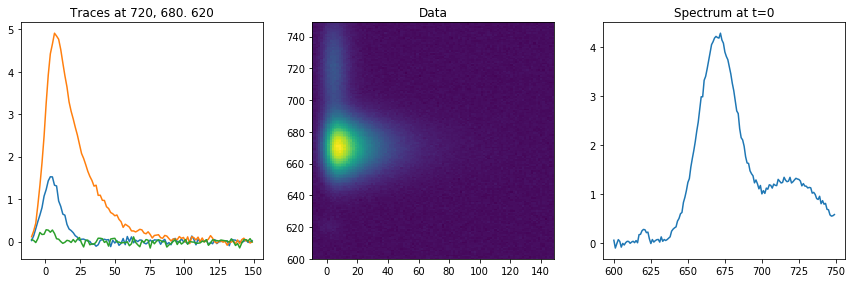

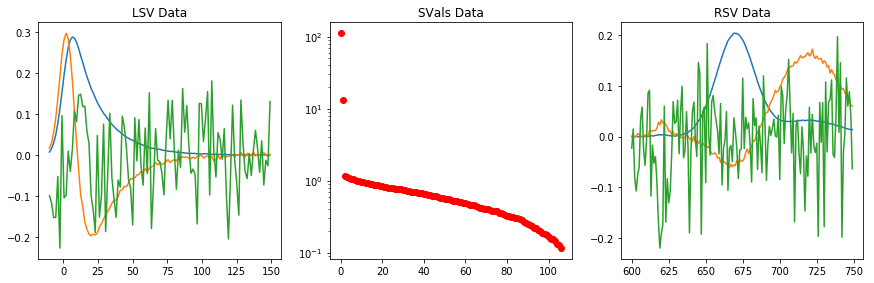

In [4]:
# Plot the Data

dataset = model.get_dataset("dataset1")
data = dataset.get()

plt.figure(figsize=(20, 20))

# Plot some time traces
plt.subplot(4, 4, 1)
wl = [720, 680, 620]
plt.title(f'Traces at {wl[0]}, {wl[1]}. {wl[2]}')
for w in wl:
    i = (np.abs(spectral_axis-w)).argmin()
    plt.plot(time_axis, data[i, :])

# Full Data
plt.subplot(4, 4, 2)
plt.title('Data')
plt.pcolormesh(time_axis, spectral_axis, data)

# Plot the spectrum at time=0
time_zero = 0
time_zero_idx = (np.abs(time_axis-time_zero)).argmin()
plt.subplot(4, 4, 3)
plt.title('Spectrum at t=0')
plt.plot(spectral_axis, data[:, time_zero_idx])


plt.figure(figsize=(20, 20))

lsvd, svals, rsvd = dataset.svd()

# Plot left singular vectors (LSV, times, first 4)
plt.subplot(4, 4, 1)
plt.title('LSV Data')
for i in range(3):
    plt.plot(time_axis, lsvd[:, i])

# Plot singular values (SV)
plt.subplot(4, 4, 2)
plt.title('SVals Data')
plt.plot(range(max(10, min(len(time_axis), len(spectral_axis)))), svals, 'ro')
plt.yscale('log')

# Plot right singular vectors (RSV, wavelengths, first 4)
plt.subplot(4, 4, 3)
plt.title('RSV Data')
for i in range(3):
    plt.plot(spectral_axis, rsvd[:, i])

In [5]:
result = model.fit()
result.best_fit_parameter.pretty_print()

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.9681e+01                                    2.03e+01    
       1              2         1.9678e+01      3.02e-03       4.53e+00       2.04e+01    
       2              3         1.9677e+01      7.41e-04       1.13e+01       2.10e+01    
       3              5         1.9670e+01      6.68e-03       7.05e-01       1.58e+00    
       4              7         1.9670e+01      6.64e-05       3.53e-01       4.09e-01    
       5              8         1.9670e+01      1.21e-04       7.05e-01       1.84e+00    
       6             10         1.9670e+01      2.94e-04       3.53e-01       1.34e-01    
       7             12         1.9669e+01      1.79e-04       1.76e-01       4.38e-01    
       8             13         1.9669e+01      7.93e-05       3.53e-01       4.90e+00    
       9             14         1.9669e+01      2.47e-04       8.80e-03       5.21e-03    

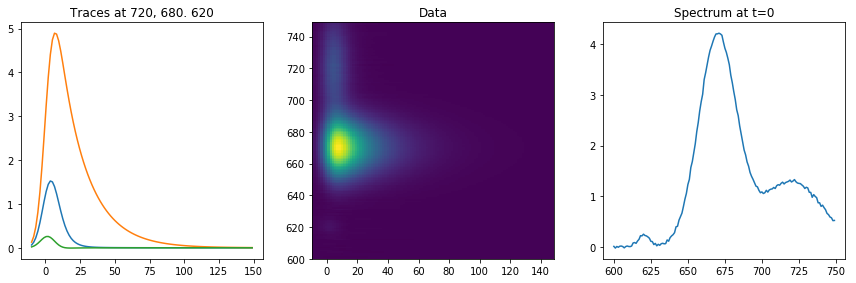

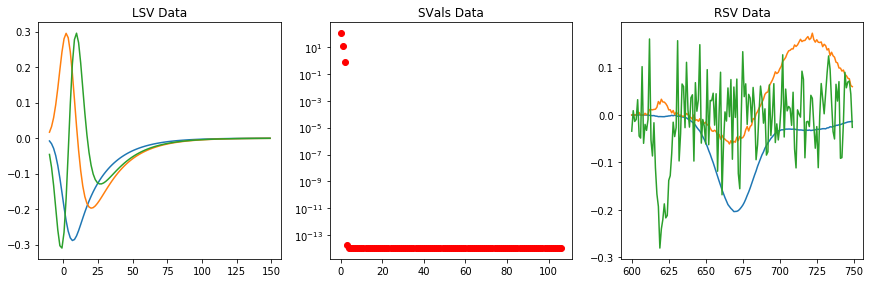

In [6]:
# Plot the Fitted Data

dataset = result.fitted_data("dataset1")
data = dataset.get()

plt.figure(figsize=(20, 20))

# Plot some time traces
plt.subplot(4, 4, 1)
wl = [720, 680, 620]
plt.title(f'Traces at {wl[0]}, {wl[1]}. {wl[2]}')
for w in wl:
    i = (np.abs(spectral_axis-w)).argmin()
    plt.plot(time_axis, data[i, :])

# Full Data
plt.subplot(4, 4, 2)
plt.title('Data')
plt.pcolormesh(time_axis, spectral_axis, data)

# Plot the spectrum at time=0
time_zero = 0
time_zero_idx = (np.abs(time_axis-time_zero)).argmin()
plt.subplot(4, 4, 3)
plt.title('Spectrum at t=0')
plt.plot(spectral_axis, data[:, time_zero_idx])


plt.figure(figsize=(20, 20))

lsvd, svals, rsvd = dataset.svd()

# Plot left singular vectors (LSV, times, first 4)
plt.subplot(4, 4, 1)
plt.title('LSV Data')
for i in range(3):
    plt.plot(time_axis, lsvd[:, i])

# Plot singular values (SV)
plt.subplot(4, 4, 2)
plt.title('SVals Data')
plt.plot(range(max(10, min(len(time_axis), len(spectral_axis)))), svals, 'ro')
plt.yscale('log')

# Plot right singular vectors (RSV, wavelengths, first 4)
plt.subplot(4, 4, 3)
plt.title('RSV Data')
for i in range(3):
    plt.plot(spectral_axis, rsvd[:, i])